##  TASK  : In this file you will receive the following:

### Marketing operational data from the Bureau of Transportation Statistics containing the dates, airlines, origin cities, destination cities, departure times, delay times (early departures are negative, and converted to 0 delay in the new column), causes for delay and, if applicable, the cancellation data (binary 1/0 column, where 1 == Cancelled) as well as the cancellation code. 
# Accompanying you will find a lookup csv files contain the airline code as well as the explanation of the meaning of the cancellation code.

## Your task is the following:
### Recommend the best airline (i.e. American Airlines or Delta) based on the flight delay/flight cancellation data. 
### Please use Python to accomplish this task. If you are not familiar with Python, you can use R

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
import csv
flights_delay = pd.read_csv("D://Flights/flights_delay.csv", sep=';')
marketing_carrier_code = pd.read_csv("D://Flights/marketing_carrier_code.csv",delimiter =',',quotechar =',' , sep = ',', quoting=csv.QUOTE_MINIMAL,
                    doublequote=False, skipinitialspace=True, error_bad_lines=False)
operating_carrier_code =  pd.read_csv("D://Flights/operating_carrier_code.csv",delimiter =',',quotechar =',' , sep = ',', quoting=csv.QUOTE_NONE,
                    doublequote=False, skipinitialspace=True, error_bad_lines=False)
cancellation_code = pd.read_csv("D://Flights/cancellation_code.csv",delimiter =',',quotechar =',' , sep = ',', quoting=csv.QUOTE_MINIMAL,
                    doublequote=False, skipinitialspace=True, error_bad_lines=False)

b'Skipping line 4: expected 2 fields, saw 3\nSkipping line 7: expected 2 fields, saw 3\nSkipping line 8: expected 2 fields, saw 3\nSkipping line 11: expected 2 fields, saw 3\nSkipping line 12: expected 2 fields, saw 3\nSkipping line 17: expected 2 fields, saw 3\nSkipping line 18: expected 2 fields, saw 3\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 24: expected 2 fields, saw 3\nSkipping line 25: expected 2 fields, saw 3\nSkipping line 40: expected 2 fields, saw 3\nSkipping line 41: expected 2 fields, saw 3\nSkipping line 42: expected 2 fields, saw 3\nSkipping line 44: expected 2 fields, saw 3\nSkipping line 62: expected 2 fields, saw 3\nSkipping line 73: expected 2 fields, saw 3\nSkipping line 79: expected 2 fields, saw 3\nSkipping line 91: expected 2 fields, saw 3\nSkipping line 100: expected 2 fields, saw 3\nSkipping line 101: expected 2 fields, saw 3\nSkipping line 102: expected 2 fields, saw 3\nSkipping line 105: expected 2 fields, saw 4\nSkipping line 107: expected 2

## 1. Data cleaning

In [3]:
df=flights_delay

In [4]:
df.head(10)


,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1.12.2020,AA,OH,"Norfolk, VA","Charlotte, NC",1210.0,-9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.12.2020,AA,OH,"Peoria, IL","Charlotte, NC",655.0,-5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.12.2020,AA,OH,"Charleston/Dunbar, WV","Charlotte, NC",826.0,96.0,0.0,NaN,0.0,96.0,53.0,0.0,0.0
3,1.12.2020,AA,OH,"Cincinnati, OH","Charlotte, NC",1158.0,-4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.12.2020,AA,OH,"Charlotte, NC","Cincinnati, OH",1453.0,-7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.12.2020,AA,OH,"Cincinnati, OH","Charlotte, NC",1719.0,-11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.12.2020,AA,OH,"Charlotte, NC","Knoxville, TN",1813.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1.12.2020,AA,OH,"Charlotte, NC","Cincinnati, OH",1317.0,-7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.12.2020,AA,OH,"Cincinnati, OH","Charlotte, NC",1525.0,-4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1.12.2020,AA,OH,"Charlotte, NC","Rochester, NY",2014.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


The first column that I will concentrate on is the OP_CARRIER which refers to the airline identifier. I will change this to the airlines extended names

The source that I used to find out the extended names was wikipedia

In [5]:
df.MKT_CARRIER.unique()

array(['AA', 'DL', 'AS', 'UA', 'F9', 'HA', 'NK', 'B6', 'WN', 'G4'],
      dtype=object)

In [6]:
df['MKT_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [7]:
df.MKT_CARRIER.nunique()

10

In [8]:
df.MKT_CARRIER.value_counts()

American Airlines     198616
Delta Airlines        191808
United Airlines       140050
Southwest Airlines    126443
Alaska Airlines        49324
Spirit Airlines        24334
JetBlue Airways        20165
Frontier Airlines      13833
Allegiant Air          13480
Hawaiian Airlines       6800
Name: MKT_CARRIER, dtype: int64

## CANCELLED

According to the definition that I gave of a Delayed Flight, a canceled flight is not a delayed flight as it 
never left nor arrived to its destination for whatever reason.

In [9]:
df.CANCELLED.nunique()

2

In [10]:
df.CANCELLED.value_counts()

0.0    775454
1.0      9399
Name: CANCELLED, dtype: int64

This is a binary column where number 1 equals a canceled flight, and a 0 not canceled, therefore we can drop the flights that were canceled, equivalent to 9399.

What I will do to double check that what I'm going to drop is correct, is to create a dummy dataframe that will only have the CANCELLED values equal to 1, 
and therefore referring to canceled flights. If it works then I will drop those flights.

In [11]:
dummy = df[(df['CANCELLED'] == 1)]
print('dummy shape:', dummy.shape)
print('====================================')
print('dummy dataframe:')
dummy.head(3).append(dummy.tail(3))

dummy shape: (9399, 14)
dummy dataframe:


,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
165,1.12.2020,American Airlines,OH,"Providence, RI","Charlotte, NC",NaN,NaN,1.0,B,NaN,NaN,NaN,NaN,NaN
749,1.12.2020,United Airlines,OO,"Denver, CO","Springfield, MO",NaN,NaN,1.0,C,NaN,NaN,NaN,NaN,NaN
763,1.12.2020,United Airlines,OO,"Denver, CO","Boise, ID",NaN,NaN,1.0,C,NaN,NaN,NaN,NaN,NaN
784731,1.2.2021,Southwest Airlines,WN,"Fort Lauderdale, FL","Islip, NY",NaN,NaN,1.0,B,NaN,NaN,NaN,NaN,NaN
784788,1.2.2021,Southwest Airlines,WN,"Houston, TX","Baltimore, MD",NaN,NaN,1.0,B,NaN,NaN,NaN,NaN,NaN
784790,1.2.2021,Southwest Airlines,WN,"Houston, TX","Baltimore, MD",NaN,NaN,1.0,B,NaN,NaN,NaN,NaN,NaN


In [12]:
dummy.CANCELLED.nunique()

1

In [13]:
dummy.CANCELLED.value_counts()

1.0    9399
Name: CANCELLED, dtype: int64

It seems as it did work and that dummy dataframe has only canceled flights, so lets proceed to drop those flights

In [14]:
df = df[(df['CANCELLED'] == 0)]
df.head(2)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",1210.0,-9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",655.0,-5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#df = df.drop(['CANCELLED'], axis = 1)

In [16]:
df.shape

(775454, 14)

## CANCELLATION_CODE

In [17]:
df.CANCELLATION_CODE.nunique()

0

In [18]:
df.CANCELLATION_CODE.value_counts()

Series([], Name: CANCELLATION_CODE, dtype: int64)

In [19]:
df.CANCELLATION_CODE.unique()

array([nan], dtype=object)

In [20]:
cancellation_code

,Code,Description
0,"""A","""""Carrier"""""""
1,"""B","""""Weather"""""""
2,"""C","""""National Air System"""""""
3,"""D","""""Security"""""""


In [21]:
CC_A = df['CANCELLATION_CODE'] == 'A'
CC_B = df['CANCELLATION_CODE'] == 'B'
CC_C = df['CANCELLATION_CODE'] == 'C'
CC_D = df['CANCELLATION_CODE'] == 'D'

In [22]:
df_CC_A = df[CC_A]
df_CC_B = df[CC_B]
df_CC_C = df[CC_C]
df_CC_D = df[CC_D]
print('df1_CC_A shape:', df_CC_A.shape)
print('df1_CC_B shape:', df_CC_B.shape)
print('df1_CC_C shape:', df_CC_C.shape)
print('df1_CC_D shape:', df_CC_D.shape)

df1_CC_A shape: (0, 14)
df1_CC_B shape: (0, 14)
df1_CC_C shape: (0, 14)
df1_CC_D shape: (0, 14)


In [23]:
df = df.drop(["CANCELLATION_CODE"], axis=1)

## ORIGIN_CITY_NAME & DEST_CITY_NAME

These two column have the IATA airports codes for the origin and destination. 
I will try to change it to a real city name so that I can do flight analysis per city as well as part of the EDA.

In [24]:
marketing_carrier_code.head(10)

,Code,Description
0,"""02Q","""""Titan Airways (2006 - )"""""""
1,"""04Q","""""Tradewind Aviation (2006 - )"""""""
2,"""06Q","""""Master Top Linhas Aereas Ltd. (2007 - )"""""""
3,"""07Q","""""Flair Airlines Ltd. (2007 - )"""""""
4,"""0BQ","""""DCA (2007 - )"""""""
5,"""0CQ","""""ACM AIR CHARTER GmbH (2007 - )"""""""
6,"""0HQ","""""Polar Airlines de Mexico d/b/a Nova Air (200..."
7,"""0IQ","""""Lynx Aviation d/b/a Frontier Airlines (2007 ..."
8,"""0J","""""JetClub AG (2007 - )"""""""
9,"""0JQ","""""Vision Airlines (2008 - 2015)"""""""


In [25]:
operating_carrier_code.head(10)

,Code,Description
0,"""02Q","""""Titan Airways"""""""
1,"""04Q","""""Tradewind Aviation"""""""
2,"""06Q","""""Master Top Linhas Aereas Ltd."""""""
3,"""07Q","""""Flair Airlines Ltd."""""""
4,"""0BQ","""""DCA"""""""
5,"""0CQ","""""ACM AIR CHARTER GmbH"""""""
6,"""0HQ","""""Polar Airlines de Mexico d/b/a Nova Air"""""""
7,"""0J","""""JetClub AG"""""""
8,"""0JQ","""""Vision Airlines"""""""
9,"""0OQ","""""Open Skies"""""""


# DELAY REASONS

On this section I will deal with 5 columns at the same time that are related:

CARRIER_DELAY
WEATHER_DELAY
NAS_DELAY
SECURITY_DELAY
LATE_AIRCRAFT_DELAY
These 5 are all reasons for the flights to be delayed. Before I make any decision related to them, 
let's see how much information is in them first:

In [26]:
print(df.CARRIER_DELAY.isna().sum())
print(df.WEATHER_DELAY.isna().sum())
print(df.NAS_DELAY.isna().sum())
print(df.SECURITY_DELAY.isna().sum())
print(df.LATE_AIRCRAFT_DELAY.isna().sum())

691696
691696
691696
691696
691696


It seems there are no  values missing

In [27]:
df = df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print('The current shape of df1 is:', df.shape)
df.head(3).append(df.tail(3))

The current shape of df1 is: (775454, 8)


,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,CANCELLED
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",1210.0,-9.0,0.0
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",655.0,-5.0,0.0
2,1.12.2020,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",826.0,96.0,0.0
784850,1.2.2021,Southwest Airlines,WN,"Houston, TX","Omaha, NE",2045.0,-5.0,0.0
784851,1.2.2021,Southwest Airlines,WN,"Houston, TX","Phoenix, AZ",1659.0,-6.0,0.0
784852,1.2.2021,Southwest Airlines,WN,"Houston, TX","Phoenix, AZ",814.0,-6.0,0.0


### MKT_CARRIER

is is an easy one as I won't be using the flight number for my predictions, so it is a quick drop once again

In [28]:
#df = df.drop(['MKT_CARRIER'], axis=1)
df.head(3)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,CANCELLED
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",1210.0,-9.0,0.0
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",655.0,-5.0,0.0
2,1.12.2020,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",826.0,96.0,0.0


## DEP_TIME

After analysing the data for quite some time I realized that the content of the DEP_TIME (departure time)  variables 
can be a bit misleading since they don't contain the dates. 


In [29]:
df.drop(columns=['DEP_TIME'], inplace=True)
df.head(2)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0


At this point it is a good idea to save at least a first version of the dataframe due all the pre-processing/cleaning done to it.
This way we can always come back to this point instead of re-running everything which will be time consuming due to the size 
of the data set.

In [30]:
df.to_csv('df.csv')

## More Cleaning
## Dealing with Missing Values - NaN

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775454 entries, 0 to 784852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FL_DATE            775454 non-null  object 
 1   MKT_CARRIER        775454 non-null  object 
 2   OP_UNIQUE_CARRIER  775454 non-null  object 
 3   ORIGIN_CITY_NAME   775454 non-null  object 
 4   DEST_CITY_NAME     775454 non-null  object 
 5   DEP_DELAY          775454 non-null  float64
 6   CANCELLED          775454 non-null  float64
dtypes: float64(2), object(5)
memory usage: 47.3+ MB


In [32]:
df.isna().sum()

FL_DATE              0
MKT_CARRIER          0
OP_UNIQUE_CARRIER    0
ORIGIN_CITY_NAME     0
DEST_CITY_NAME       0
DEP_DELAY            0
CANCELLED            0
dtype: int64

In [33]:
print('df shape:', df.shape)

df shape: (775454, 7)


## DEP_DELAY

The DEP_DELAY refers to the "Departure Delay", which is the difference between DEP_TIME (Actual Departure Time) and 
the SCH_DEP_TIME (Scheduled Departute time), therefore, if there are no delays for the departure, then the DEP_DELAY equals 0 
(zero), and this is when it ends up being a NaN

In [34]:
df["DEP_DELAY"] = df["DEP_DELAY"].fillna(0)
df.isna().sum()

FL_DATE              0
MKT_CARRIER          0
OP_UNIQUE_CARRIER    0
ORIGIN_CITY_NAME     0
DEST_CITY_NAME       0
DEP_DELAY            0
CANCELLED            0
dtype: int64

In [35]:
df.shape

(775454, 7)

In [36]:
df.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0
2,1.12.2020,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0
3,1.12.2020,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0
4,1.12.2020,American Airlines,OH,"Charlotte, NC","Cincinnati, OH",-7.0,0.0


## Data Engineering


## Date Format

In [37]:
df['DAY'] = pd.DatetimeIndex(df['FL_DATE']).day
df['MONTH'] = pd.DatetimeIndex(df['FL_DATE']).month
df.head(2)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,DAY,MONTH
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,12,1
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,12,1


In [38]:
print('Maximum number of days in a month:', df.DAY.nunique())
print('Total number of months:', df.MONTH.nunique())

Maximum number of days in a month: 22
Total number of months: 12


For visual purposes and because I will be using the month values to analyze which are the best and worst months to travel in terms of delays, 
I will convert the numerical (int) month value into the month abbreviation

In [39]:
import calendar
df['MONTH_AB'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [40]:
df.head(2)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,DAY,MONTH,MONTH_AB
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,12,1,Jan
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,12,1,Jan


In [41]:
print('Months present in dataframe:', df.MONTH.unique())
print('Months present in dataframe:', df.MONTH_AB.unique())

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


# 

## Prepare for Modeling
### This is a short notebook done to prepare the dataframe that will be used for all the Modeling and it will contain the same information than the df dataframe, but filtered to the top 20 destination in terms on numbers of flights

## Data Loading

In [42]:
df = pd.read_csv('df.csv', index_col=0)
df.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED
0,1.12.2020,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0
1,1.12.2020,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0
2,1.12.2020,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0
3,1.12.2020,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0
4,1.12.2020,American Airlines,OH,"Charlotte, NC","Cincinnati, OH",-7.0,0.0


In [43]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [44]:
df.WEEKDAY.value_counts()

6    131574
3    126092
0    123073
2    113158
5    100790
4     99548
1     81219
Name: WEEKDAY, dtype: int64

In [45]:
df.head(3)

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6


## Preprocessing

Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 360 total destinations.

In [46]:
df.DEST_CITY_NAME.value_counts()

Atlanta, GA              45940
Dallas/Fort Worth, TX    39449
Chicago, IL              36865
Denver, CO               35206
Charlotte, NC            30106
                         ...  
Hagerstown, MD              24
Owensboro, KY               18
Ogden, UT                   16
Adak Island, AK             15
Nantucket, MA               13
Name: DEST_CITY_NAME, Length: 360, dtype: int64

In [47]:
df.DEST_CITY_NAME.value_counts().iloc[:20]

Atlanta, GA              45940
Dallas/Fort Worth, TX    39449
Chicago, IL              36865
Denver, CO               35206
Charlotte, NC            30106
Houston, TX              24769
Seattle, WA              22108
Phoenix, AZ              21708
Los Angeles, CA          20297
Detroit, MI              18667
Salt Lake City, UT       17392
Minneapolis, MN          16887
Orlando, FL              16806
Las Vegas, NV            16536
Washington, DC           14947
New York, NY             13969
Philadelphia, PA         12466
San Francisco, CA        12139
Fort Lauderdale, FL      12034
Newark, NJ               10566
Name: DEST_CITY_NAME, dtype: int64

In [48]:
top_cities = df.DEST_CITY_NAME.value_counts().iloc[0:20].rename_axis('DEST_CITY_NAME').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST_CITY_NAME,TOTAL_FLIGHTS
0,"Atlanta, GA",45940
1,"Dallas/Fort Worth, TX",39449
2,"Chicago, IL",36865
3,"Denver, CO",35206
4,"Charlotte, NC",30106


In [49]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST_CITY_NAME.unique()

array(['Atlanta, GA', 'Dallas/Fort Worth, TX', 'Chicago, IL',
       'Denver, CO', 'Charlotte, NC', 'Houston, TX', 'Seattle, WA',
       'Phoenix, AZ', 'Los Angeles, CA', 'Detroit, MI',
       'Salt Lake City, UT', 'Minneapolis, MN', 'Orlando, FL',
       'Las Vegas, NV', 'Washington, DC', 'New York, NY',
       'Philadelphia, PA', 'San Francisco, CA', 'Fort Lauderdale, FL',
       'Newark, NJ'], dtype=object)

In [50]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST_CITY_NAME'].tolist()

In [51]:
city_list

['Atlanta, GA',
 'Dallas/Fort Worth, TX',
 'Chicago, IL',
 'Denver, CO',
 'Charlotte, NC',
 'Houston, TX',
 'Seattle, WA',
 'Phoenix, AZ',
 'Los Angeles, CA',
 'Detroit, MI',
 'Salt Lake City, UT',
 'Minneapolis, MN',
 'Orlando, FL',
 'Las Vegas, NV',
 'Washington, DC',
 'New York, NY',
 'Philadelphia, PA',
 'San Francisco, CA',
 'Fort Lauderdale, FL',
 'Newark, NJ']

### Now that it looks ok, I will use this list to filter the main dataframe (df) and create a new one called dfm which stands for "datafame for modeling"

In [52]:
boolean_series = df.DEST_CITY_NAME.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6
3,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0,6
5,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-11.0,0.0,6


In [53]:
dfm['DAY'] = pd.DatetimeIndex(dfm['FL_DATE']).day
dfm['MONTH'] = pd.DatetimeIndex(dfm['FL_DATE']).month

In [54]:
dfm.DEST_CITY_NAME.value_counts()

Atlanta, GA              45940
Dallas/Fort Worth, TX    39449
Chicago, IL              36865
Denver, CO               35206
Charlotte, NC            30106
Houston, TX              24769
Seattle, WA              22108
Phoenix, AZ              21708
Los Angeles, CA          20297
Detroit, MI              18667
Salt Lake City, UT       17392
Minneapolis, MN          16887
Orlando, FL              16806
Las Vegas, NV            16536
Washington, DC           14947
New York, NY             13969
Philadelphia, PA         12466
San Francisco, CA        12139
Fort Lauderdale, FL      12034
Newark, NJ               10566
Name: DEST_CITY_NAME, dtype: int64

In [55]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(438857, 10)

In [56]:
df.shape # Previous dataframe before this final filter

(775454, 8)

In [57]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438857 entries, 0 to 784852
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FL_DATE            438857 non-null  datetime64[ns]
 1   MKT_CARRIER        438857 non-null  object        
 2   OP_UNIQUE_CARRIER  438857 non-null  object        
 3   ORIGIN_CITY_NAME   438857 non-null  object        
 4   DEST_CITY_NAME     438857 non-null  object        
 5   DEP_DELAY          438857 non-null  float64       
 6   CANCELLED          438857 non-null  float64       
 7   WEEKDAY            438857 non-null  int64         
 8   DAY                438857 non-null  int64         
 9   MONTH              438857 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 36.8+ MB


In [58]:
dfm.to_csv('dfm.csv')

## Collinearity Check

Now with this reduced and cleaned dataframe it is time to look at how these features correlate to each others, and then I'll deal with the Categoricals

In [59]:
df3=dfm
dfm.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY,DAY,MONTH
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6,12,1
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6,12,1
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6,12,1
3,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0,6,12,1
5,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-11.0,0.0,6,12,1


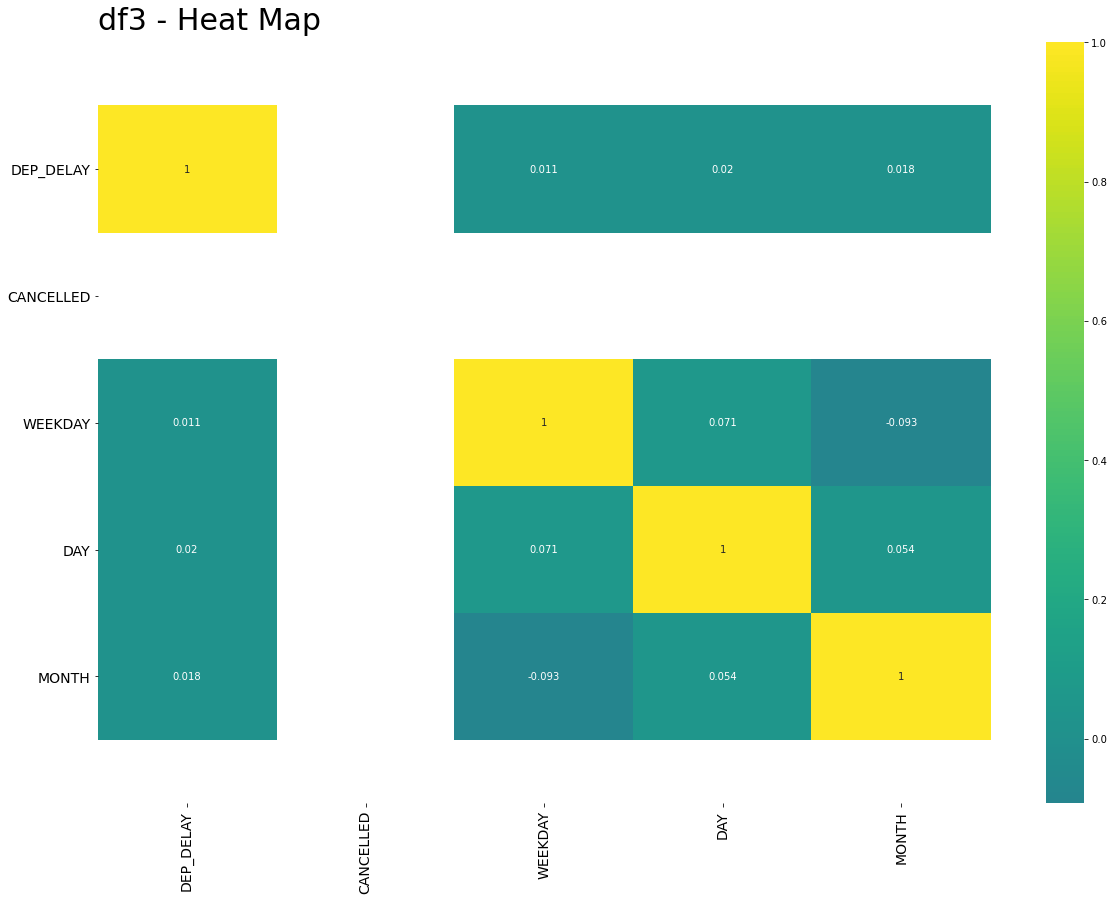

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))
ax = sns.heatmap(df3.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df3 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

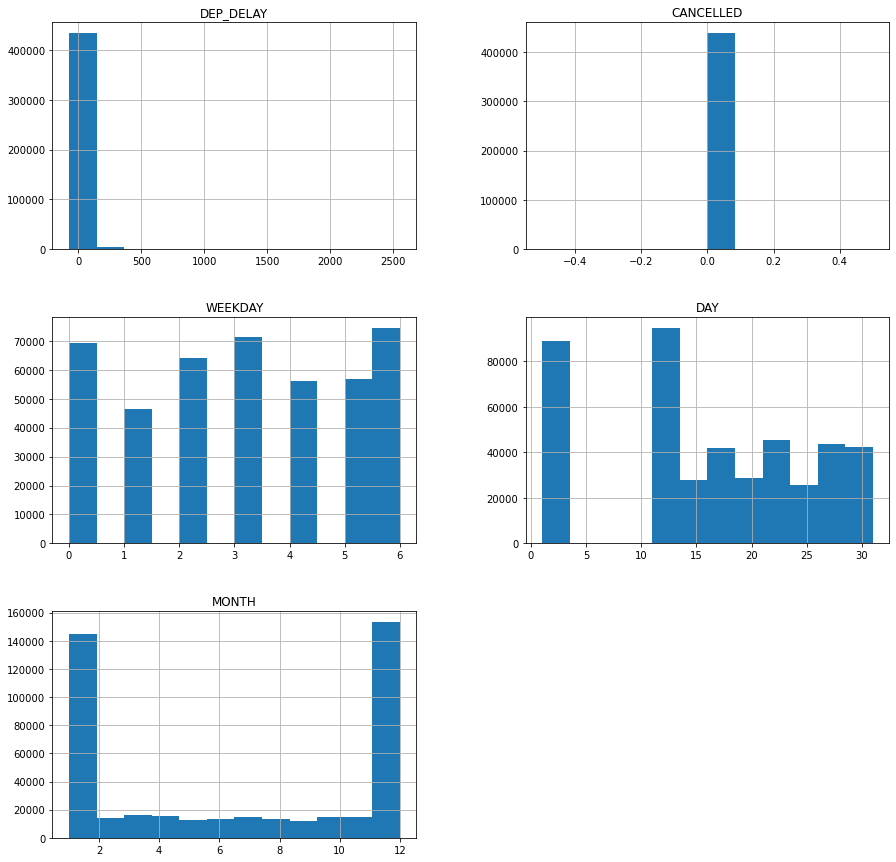

In [61]:
df3.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [62]:
df3_jan = dfm[(dfm['MONTH'] == 1)]
df3_jan.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY,DAY,MONTH
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6,12,1
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6,12,1
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6,12,1
3,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0,6,12,1
5,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-11.0,0.0,6,12,1


In [63]:
df3_jan.MONTH.value_counts()

1    144846
Name: MONTH, dtype: int64

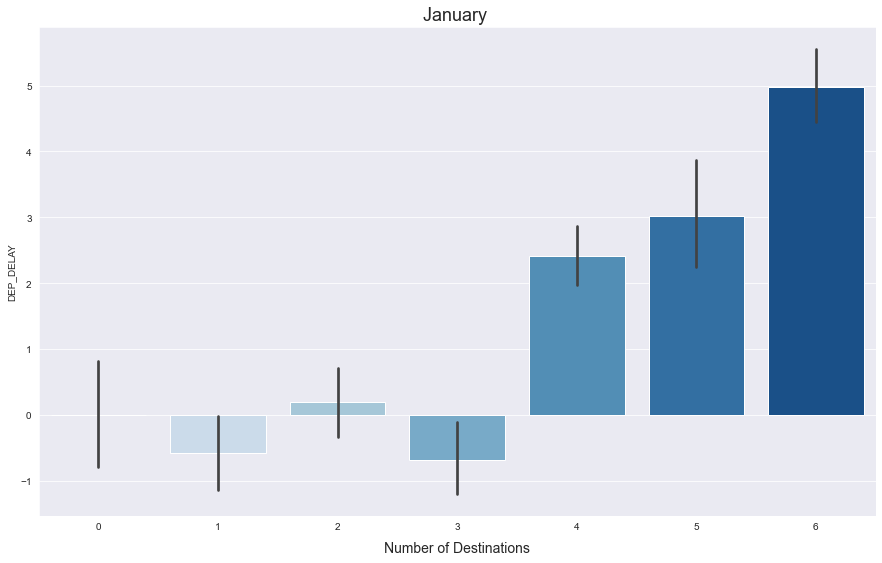

In [64]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=df3_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [65]:
df3.to_csv('df3.csv')

# EDA - Exploatary Data Analysis

Clearly the pre-processing/cleaning notebook already represents a part of the EDA, but since that one was rather large, I thought it would be better to put all the visualizations on a separate one to make it easier to follow. There might be some additional cleaning if necessary on this notebook, of some more feature engineer which will be dictated as I try to answer some of the key questions related to delays.

In [66]:
df = pd.read_csv('df3.csv', index_col=0)
df.head(3).append(df.tail(3))

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY,DAY,MONTH
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6,12,1
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6,12,1
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6,12,1
784837,2021-01-02,Southwest Airlines,WN,"Houston, TX","Chicago, IL",-2.0,0.0,5,2,1
784851,2021-01-02,Southwest Airlines,WN,"Houston, TX","Phoenix, AZ",-6.0,0.0,5,2,1
784852,2021-01-02,Southwest Airlines,WN,"Houston, TX","Phoenix, AZ",-6.0,0.0,5,2,1


In [67]:
df.shape

(438857, 10)

In [68]:
df.columns

Index(['FL_DATE', 'MKT_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME',
       'DEST_CITY_NAME', 'DEP_DELAY', 'CANCELLED', 'WEEKDAY', 'DAY', 'MONTH'],
      dtype='object')

## Total Number of Flights per Airline

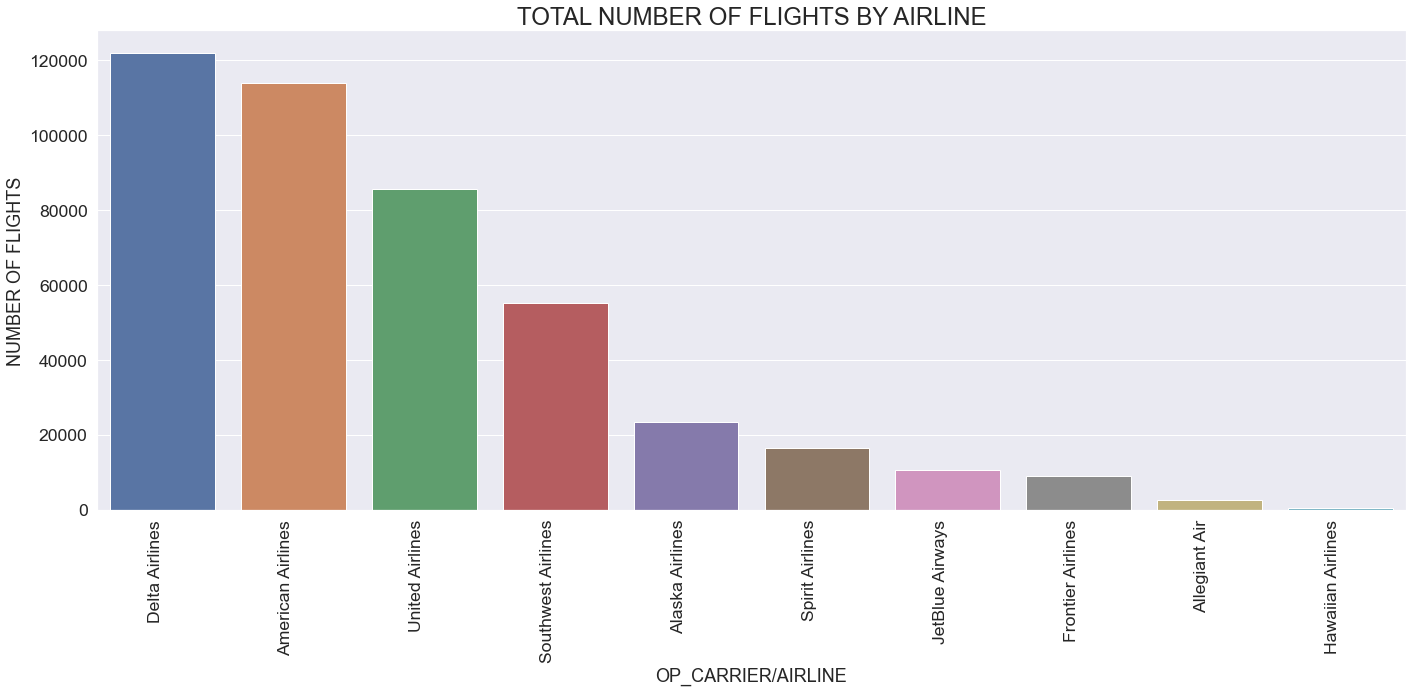

In [69]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['MKT_CARRIER'], data=df, order=df['MKT_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [70]:
df.MKT_CARRIER.value_counts()

Delta Airlines        121752
American Airlines     113865
United Airlines        85442
Southwest Airlines     55186
Alaska Airlines        23406
Spirit Airlines        16501
JetBlue Airways        10656
Frontier Airlines       9044
Allegiant Air           2468
Hawaiian Airlines        537
Name: MKT_CARRIER, dtype: int64

This is quite an interesting plot to start with as it already tells us which are the airlines with the most domestic 
flights in the US:

1. Delta Airlines
2. American Airlines
3. United Airlines 


Now the question to ask ourselves would be: if the top 5 airlines in terms of number of flight, are also the best in terms 
    of arriving on time? Lets see which are the airlines with the most delayed flight to try to answer this:

## ANSWER : We can see that Delta Airlines made most flights

# 20 Most Common Destination (Cities)

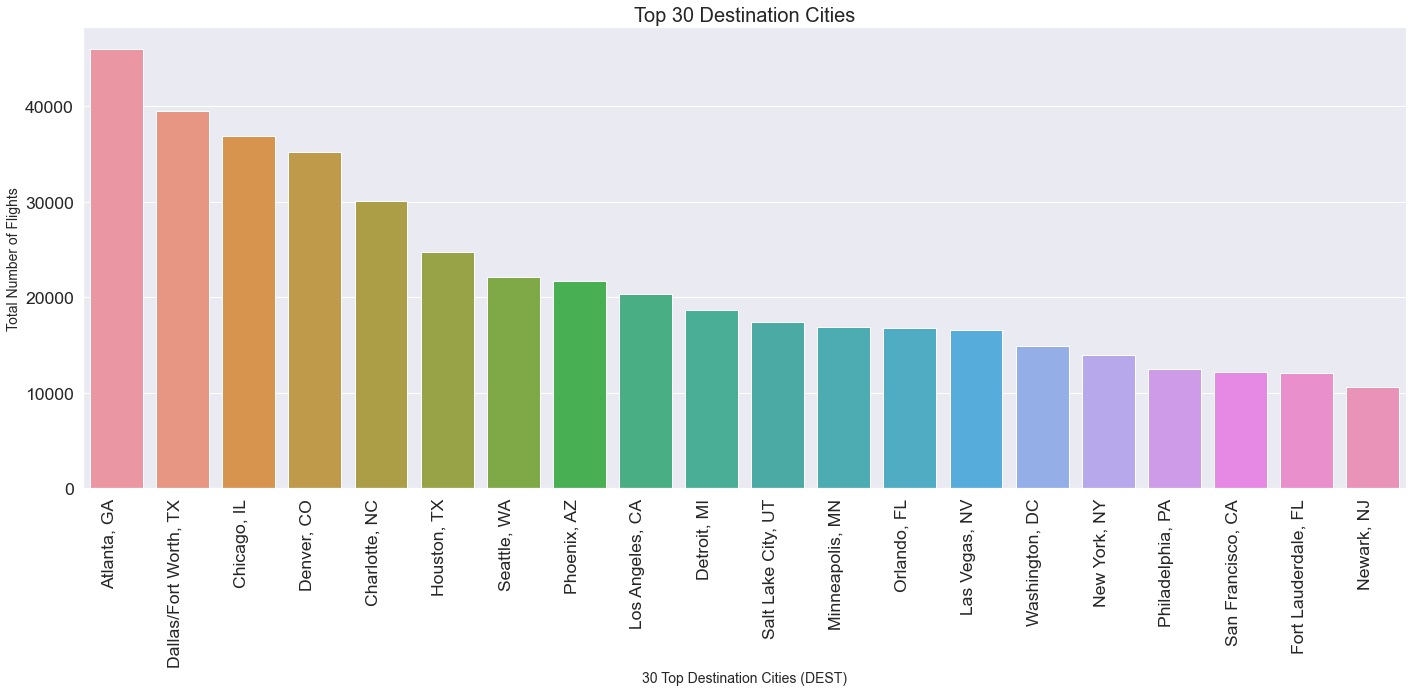

In [71]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['DEST_CITY_NAME'], data=df, order=df['DEST_CITY_NAME'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

## Departure Cities with the most Delayed Departure Flights

In [72]:
df.head()

,FL_DATE,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,CANCELLED,WEEKDAY,DAY,MONTH
0,2020-01-12,American Airlines,OH,"Norfolk, VA","Charlotte, NC",-9.0,0.0,6,12,1
1,2020-01-12,American Airlines,OH,"Peoria, IL","Charlotte, NC",-5.0,0.0,6,12,1
2,2020-01-12,American Airlines,OH,"Charleston/Dunbar, WV","Charlotte, NC",96.0,0.0,6,12,1
3,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-4.0,0.0,6,12,1
5,2020-01-12,American Airlines,OH,"Cincinnati, OH","Charlotte, NC",-11.0,0.0,6,12,1


In [73]:
test_6 = df[['ORIGIN_CITY_NAME', 'DEP_DELAY']]
test_6 = test_6.groupby(['ORIGIN_CITY_NAME']).mean().reset_index()
test_6.head(10)

,ORIGIN_CITY_NAME,DEP_DELAY
0,"Aberdeen, SD",11.598361
1,"Abilene, TX",5.589744
2,"Akron, OH",-0.470085
3,"Alamosa, CO",22.291262
4,"Albany, GA",-0.088889
5,"Albany, NY",3.600739
6,"Albuquerque, NM",-0.304153
7,"Alexandria, LA",3.315789
8,"Allentown/Bethlehem/Easton, PA",8.457143
9,"Alpena, MI",12.317308


In [74]:
test_7 = df.ORIGIN_CITY_NAME.value_counts().rename_axis('ORIGIN_CITY_NAME').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN_CITY_NAME,FLIGHTS
0,"Atlanta, GA",14923
1,"Chicago, IL",13554
2,"Denver, CO",12731
3,"Los Angeles, CA",11904
4,"Dallas/Fort Worth, TX",10945
5,"Houston, TX",9972
6,"Orlando, FL",9295
7,"Las Vegas, NV",9293
8,"Phoenix, AZ",9200
9,"New York, NY",8490


In [75]:
test_6_7 = pd.merge(test_7, test_6, on='ORIGIN_CITY_NAME')
test_6_7.head()

,ORIGIN_CITY_NAME,FLIGHTS,DEP_DELAY
0,"Atlanta, GA",14923,3.345172
1,"Chicago, IL",13554,4.339014
2,"Denver, CO",12731,3.019480
3,"Los Angeles, CA",11904,0.864415
4,"Dallas/Fort Worth, TX",10945,6.819370


In [76]:
test_6_7.shape

(30, 3)

In [77]:
test_6_7.describe()

,FLIGHTS,DEP_DELAY
count,30.000000,30.000000
mean,7778.500000,2.298452
std,2844.503359,2.143357
min,4169.000000,-2.793871
25%,5794.250000,1.017237
50%,7366.000000,2.766186
75%,9269.750000,3.625147
max,14923.000000,6.819370


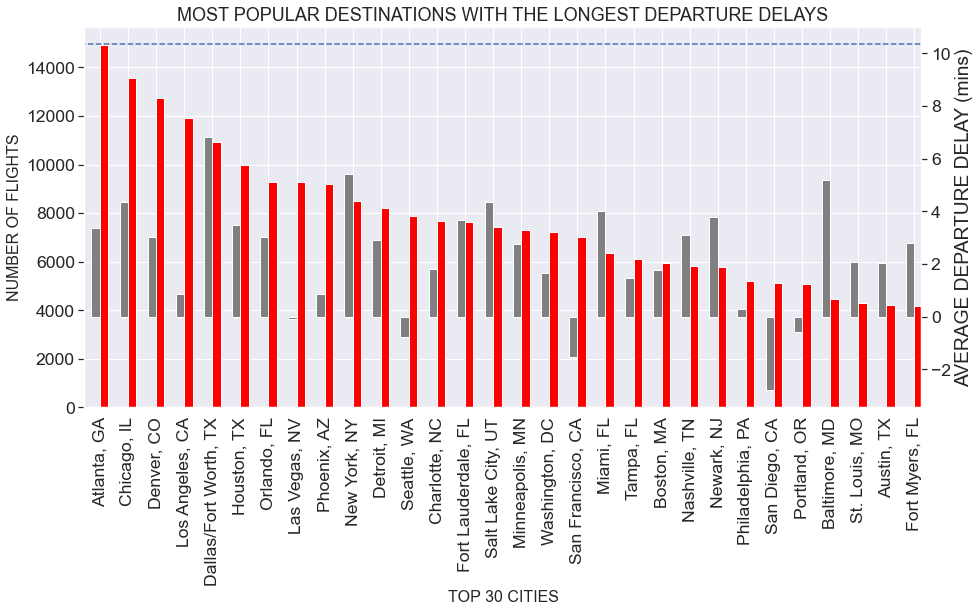

In [78]:
test_6_7 = test_6_7.set_index('ORIGIN_CITY_NAME')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEP_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

# REPORT
## First I done some data cleaning, analyzing every feature in the dataset, Data Engineering, Preprocessing, and Exploatary Data Analysis where we can se the report where I  show Total Number of Flights per Airline , where we can see that Delta Airlines made most flights. Also I made a graph with 20 Most Common Destination (Cities), and most popular destinations with the longest departure delays.